In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
# Read the CSV file
df = pd.read_csv('benchmark_results_x_y.csv')

In [9]:
# Filter for rows with IsAllWildcards = 1
wildcard_df = df[df['IsAllWildcards'] == 1]

# Create a unique identifier for each GridX-GridY pair
wildcard_df['GridPair'] = wildcard_df['GridX'].astype(str) + '_' + wildcard_df['GridY'].astype(str)

# Group by the unique grid pair and calculate mean AverageCalculationTime
grouped_df = wildcard_df.groupby('GridPair').agg({
    'GridX': 'first',
    'GridY': 'first',
    'AverageCalculationTime': 'mean',
    'TotalPaths': 'mean',
    'MemoryUsage': 'mean',
    'InitializationTime': 'mean'
}).reset_index()

# Create pivot tables
calc_pivot_table = grouped_df.pivot_table(
    index='GridY', 
    columns='GridX', 
    values='AverageCalculationTime', 
    fill_value=0
)

totalPaths_pivot_table = grouped_df.pivot_table(
    index='GridY', 
    columns='GridX', 
    values='TotalPaths', 
    fill_value=0
)

memory_pivot_table = grouped_df.pivot_table(
    index='GridY', 
    columns='GridX', 
    values='MemoryUsage', 
    fill_value=0
)

# init_pivot_table = grouped_df.pivot_table(
#     index='GridY', 
#     columns='GridX', 
#     values='InitializationTime', 
#     fill_value=0
# )

# Sort the index in ascending order
calc_pivot_table = calc_pivot_table.sort_index(ascending=False)
totalPaths_pivot_table = totalPaths_pivot_table.sort_index(ascending=False)
memory_pivot_table = memory_pivot_table.sort_index(ascending=False)
# init_pivot_table = init_pivot_table.sort_index(ascending=False)

/var/folders/dx/zc2n_2652yz886vngmv6sqc40000gn/T/ipykernel_35560/968319636.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildcard_df['GridPair'] = wildcard_df['GridX'].astype(str) + '_' + wildcard_df['GridY'].astype(str)


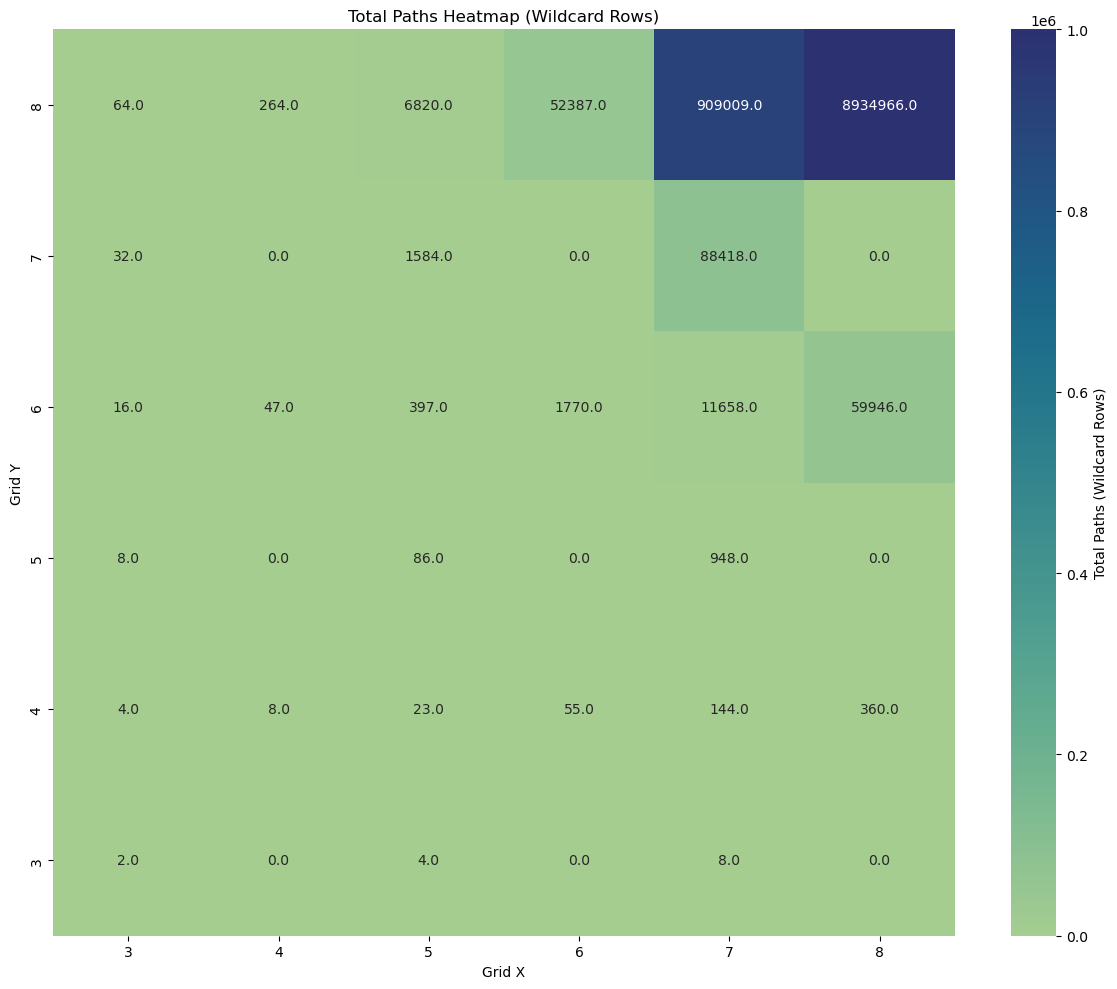

In [11]:
# Create the figure and set its size
plt.figure(figsize=(12, 10))

# Create the heatmap with a fixed color scale
# Clip values to max of 1000000 for color mapping
heatmap = sns.heatmap(totalPaths_pivot_table, 
            annot=True,  # Show the values in each cell
            cmap='crest',  # Yellow-Orange-Red color palette
            fmt='.1f',  # Format to show one decimal place
            vmin=0,  # Minimum value for color scale
            vmax=1000000,  # Maximum value for color scale
            cbar_kws={'label': 'Total Paths (Wildcard Rows)'})

plt.title('Total Paths Heatmap (Wildcard Rows)')
plt.xlabel('Grid X')
plt.ylabel('Grid Y')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

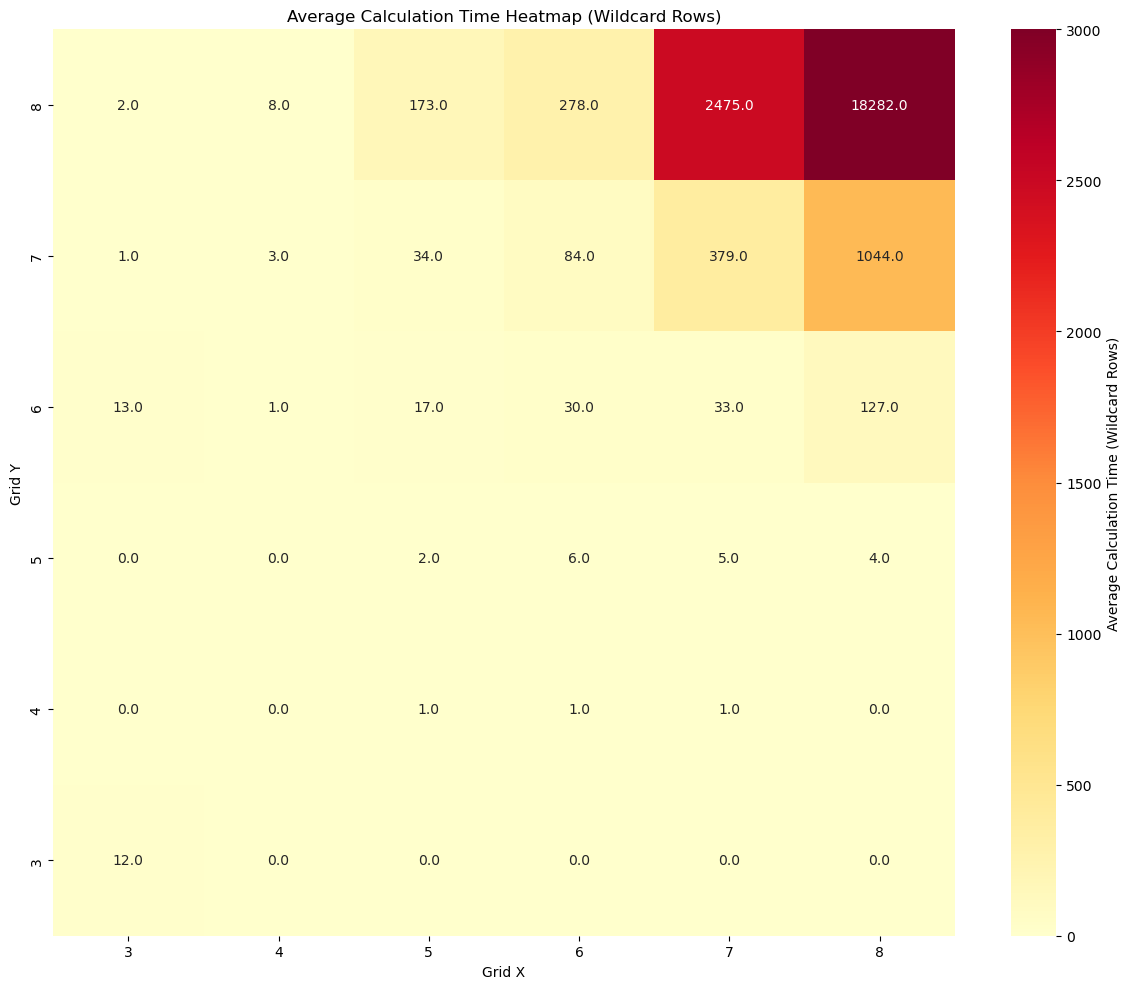

In [5]:
# Create the figure and set its size
plt.figure(figsize=(12, 10))

# Create the heatmap with a fixed color scale
# Clip values to max of 3000 for color mapping
heatmap = sns.heatmap(calc_pivot_table, 
            annot=True,  # Show the values in each cell
            cmap='YlOrRd',  # Yellow-Orange-Red color palette
            fmt='.1f',  # Format to show one decimal place
            vmin=0,  # Minimum value for color scale
            vmax=3000,  # Maximum value for color scale
            cbar_kws={'label': 'Average Calculation Time (Wildcard Rows)'})

plt.title('Average Calculation Time Heatmap (Wildcard Rows)')
plt.xlabel('Grid X')
plt.ylabel('Grid Y')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

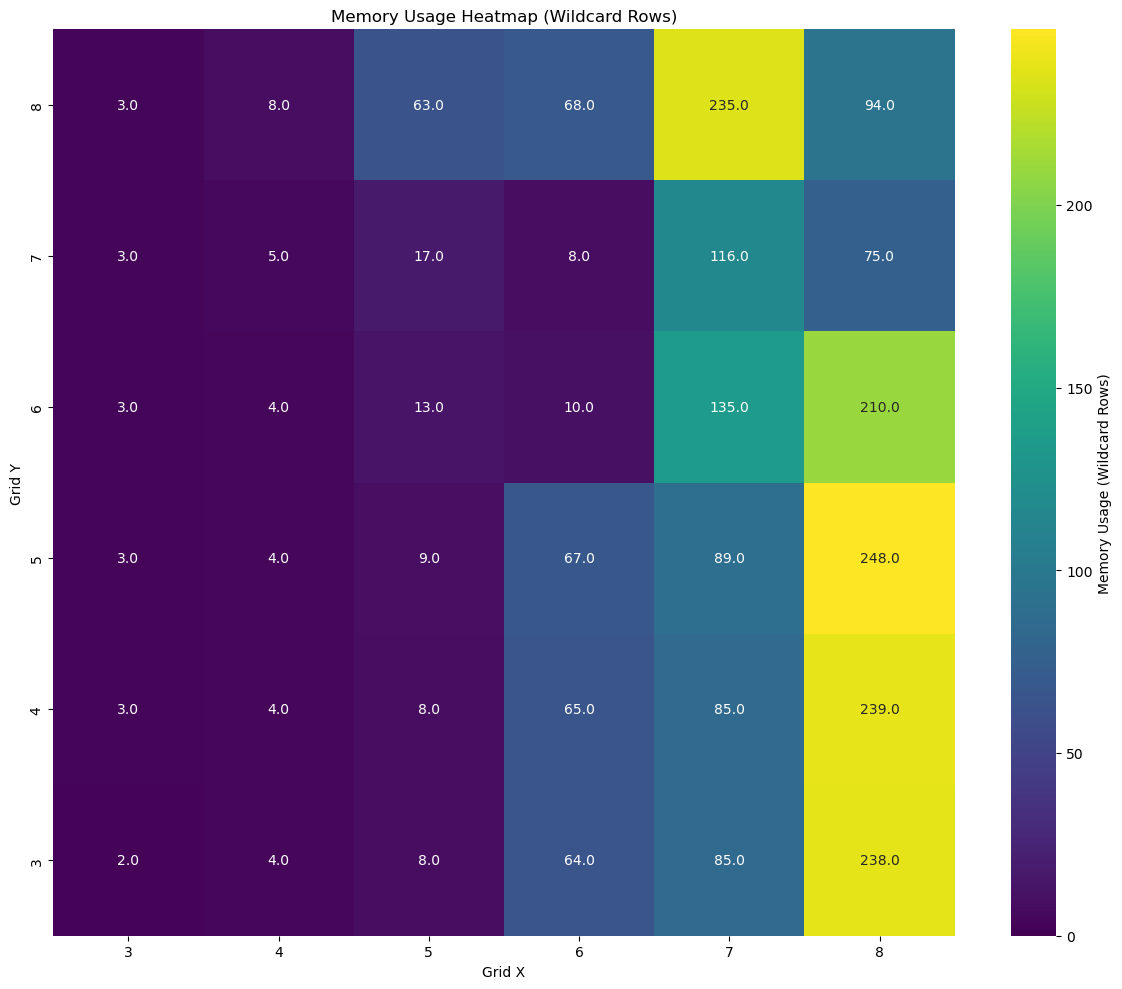

In [6]:
# Create the figure and set its size
plt.figure(figsize=(12, 10))

# Create the heatmap with a fixed color scale
# Clip values to max of 3000 for color mapping
heatmap = sns.heatmap(memory_pivot_table, 
            annot=True,  # Show the values in each cell
            cmap='viridis',  # Yellow-Orange-Red color palette
            fmt='.1f',  # Format to show one decimal place
            vmin=0,  # Minimum value for color scale
            vmax=248,  # Maximum value for color scale
            cbar_kws={'label': 'Memory Usage (Wildcard Rows)'})

plt.title('Memory Usage Heatmap (Wildcard Rows)')
plt.xlabel('Grid X')
plt.ylabel('Grid Y')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()